<a href="https://colab.research.google.com/github/Shraddha-gami-source/Machine-Learning/blob/master/K_meansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

##Load the data

In [3]:
data = pd.read_csv("3.01. Country clusters.csv")
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


##Plot the data

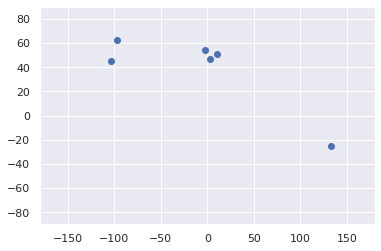

In [5]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show()

##Select the features

In [6]:
x = data.iloc[:,1:3]

In [7]:
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


##Clustering

In [13]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

##Clustering Results

In [14]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([2, 2, 0, 0, 0, 1], dtype=int32)

In [15]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


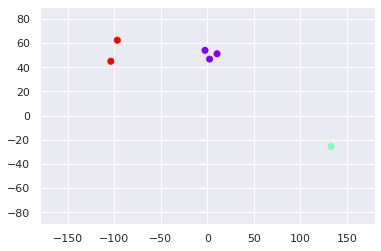

In [16]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Clusters'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show()

##Map the data with language(Clustering with Language)

In [22]:
data_mapped = data.copy()
data_mapped['Language'] = data_mapped['Language'].map({"English":0, "French":1, "German": 2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


##Select the Features

In [23]:
x = data_mapped.iloc[:,3:4]
x

,Language
0,0
1,0
2,1
3,0
4,2
5,0


##Clustering

In [24]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

##Clustering results

In [25]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 2, 1, 0, 1], dtype=int32)

In [26]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,2
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


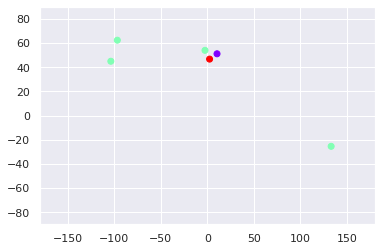

In [28]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Clusters'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show()

#Choosing both location and language

In [30]:
data_mapped = data.copy()
data_mapped['Language'] = data_mapped['Language'].map({"English":0, "French":1, "German": 2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [31]:
x = data_mapped.iloc[:,1:4]
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


In [36]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [37]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, 0, 0, 1], dtype=int32)

In [38]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


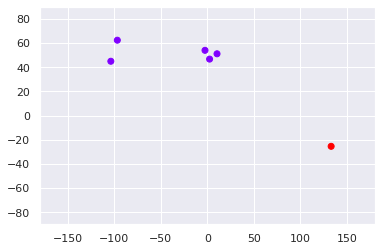

In [39]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Clusters'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show()

#Selecting the number of Clusters

##WCSS

In [40]:
kmeans.inertia_

13208.95812

In [42]:
wcss = []

for i in range(1,7):
  kmeans = KMeans(i)
  kmeans.fit(x)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

wcss

[42605.41356666667,
 13208.95812,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

##Elbow Method

Text(0, 0.5, 'Within clusters Sum of squares')

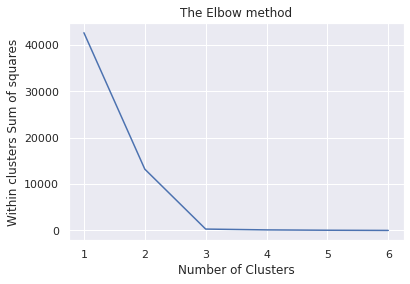

In [43]:
number_clusters = range(1, 7)
plt.plot(number_clusters, wcss)
plt.title("The Elbow method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within clusters Sum of squares")